# Plot OpenFAST Outputs

In [9]:
# Load all the tools
import numpy as np
# from wisdem.aeroelasticse.CaseLibrary import ROSCO_Test
import os, subprocess

# from weis.aeroelasticse.FAST_reader import InputReader_Common, InputReader_OpenFAST, InputReader_FAST7
# from weis.aeroelasticse.FAST_writer import InputWriter_Common, InputWriter_OpenFAST, InputWriter_FAST7
# from weis.aeroelasticse.runFAST_pywrapper import runFAST_pywrapper_batch
# from weis.aeroelasticse.CaseGen_General import CaseGen_General
# from weis.aeroelasticse.CaseGen_IEC import CaseGen_IEC
# from pCrunch import pdTools
# from pCrunch import Processing, Analysis
# from weis.aeroelasticse.Util import FileTools

# Instantiate fast_IO
from ROSCO_toolbox.ofTools.fast_io import output_processing

from ROSCO_toolbox.ofTools.util import spectral


import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib

i_fig = 0

rpm2RadSec = 2.0*(np.pi)/60.0



Set outputs

In [74]:
outfiles = [
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_00.outb',
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_01.outb',
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_02.outb',
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_08.outb',
#     '/Users/dzalkind/Tools/ROSCO_toolbox/Examples/examples_out/13_Simulink_Test/OL_Test_1.SFunc.outb',
    # '/Users/dzalkind/Projects/BAR/BAR_Designs/BAR_USC/ROSCO_BAR_USC/turb_bts/base/ROSCO_BAR_USC_0.out',
    # '/Users/dzalkind/Tools/ROSCO/outputs/PRC_0/IEA15MW_PRC/power_curve/base/IEA15MW_PRC_0.outb',
    # '/Users/dzalkind/Tools/ROSCO/outputs/PRC_1/IEA15MW_PRC/power_curve/base/IEA15MW_PRC_0.out',
    '/Users/dzalkind/Tools/ROSCO/outputs/PRC_2/IEA15MW_PRC/power_curve/base/IEA15MW_PRC_01.out',
#     '/Users/dzalkind/Tools/WEIS-3/results/UMaine-Semi/DISCON/IB_NTM_Raft/iea15mw_1.outb',
#     '/Users/dzalkind/Tools/WEIS-3/results/UMaine-Semi/DISCON/IB_NTM_Raft/iea15mw_2.outb',
#     '/Users/dzalkind/Tools/WEIS-3/results/CT-semi/ntm_long/DISCON-CT-semi/iea15mw_13.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/both_debug_nowrapper/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug2/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug3/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug4/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-3/sowfa_debug/rotor_sweep/c_001_sp6_h150_D240_oR2_yaw_base/IEA-15-240-RWT-Monopile.2.T2.out',
#     '/Users/dzalkind/Tools/WEIS-3/results/CT-barge/DISCON-CT-barge_hiBW/simp/step_1.outb',
]

# outfiles

WE_Vw_F is not available as an output channel.
VS_RefSpd is not available as an output channel.
PC_RefSpd is not available as an output channel.
PC_SpdErr is not available as an output channel.
VS_SpdErr is not available as an output channel.
Fl_PitCom is not available as an output channel.
PC_MinPit is not available as an output channel.
WE_Vw is not available as an output channel.


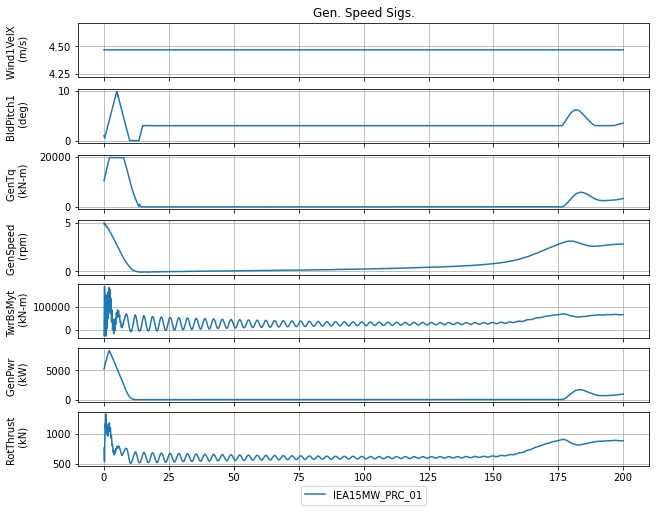

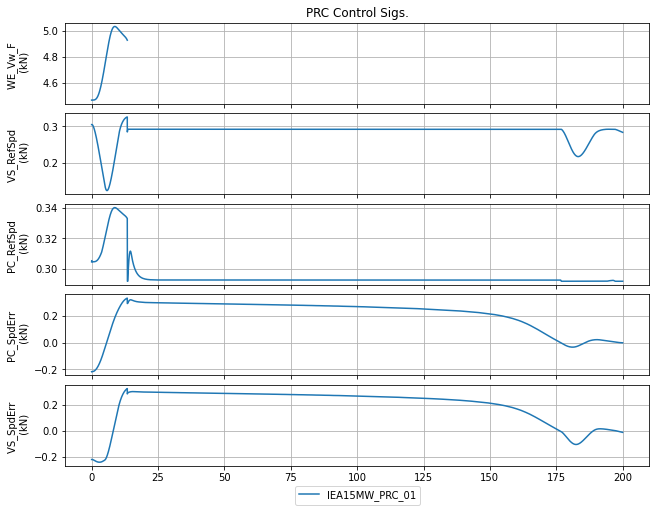

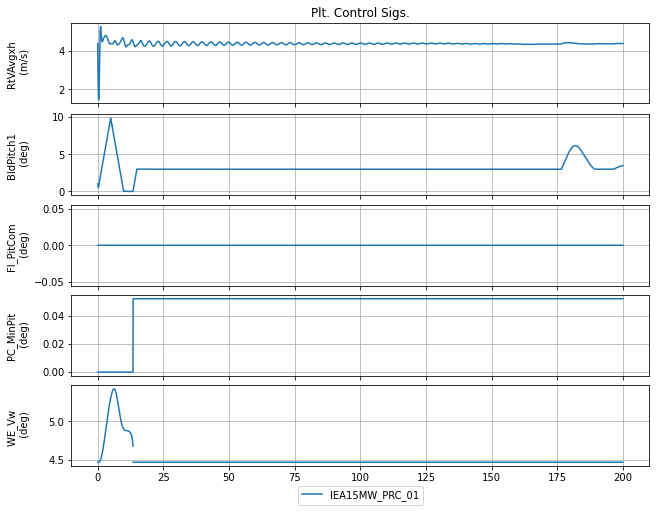

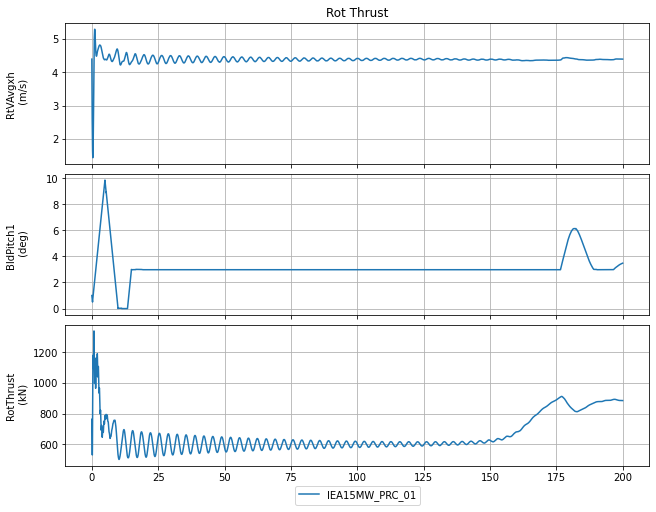

In [75]:
output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,7]

ROSCO = True
ROSCO2 = True

#  Define Plot cases 
cases = {}
cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'BldPitch1', 'GenTq', 'GenSpeed','TwrBsMyt','GenPwr','RotThrust']#,'PtfmPitch','PtfmYaw','NacYaw']
# cases['Debug'] = ['IPDefl1','OoPDefl1','Azimuth','RotTorq']#,'PtfmPitch','PtfmYaw','NacYaw']
cases['PRC Control Sigs.'] = ['WE_Vw_F','VS_RefSpd', 'PC_RefSpd','PC_SpdErr','VS_SpdErr']
cases['Plt. Control Sigs.'] = ['RtVAvgxh', 'BldPitch1', 'Fl_PitCom', 'PC_MinPit','WE_Vw']
# cases['Platform Motion'] = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmPitch','PtfmRoll','PtfmYaw']
cases['Rot Thrust'] = ['RtVAvgxh','BldPitch1','RotThrust']

op = output_processing.output_processing()
op_RO = output_processing.output_processing()
op_RO2 = output_processing.output_processing()



fast_out = []
fast_out = op.load_fast_out(outfiles, tmin=0)
if ROSCO:
    # Rosco outfiles
    r_outfiles = [out.split('.out')[0] + '.RO.dbg' for out in outfiles]
    rosco_out = op_RO.load_fast_out(r_outfiles, tmin=0)
    
    if ROSCO2:
        r_outfiles = [out.split('.out')[0] + '.RO.dbg2' for out in outfiles]
        rosco_out2 = op_RO2.load_fast_out(r_outfiles, tmin=0)
  
# Combine outputs
if ROSCO:
    comb_out = [None] * len(fast_out)
    for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
        r_out.update(f_out)
        comb_out[i] = r_out
    if ROSCO2:
        for i, (r_out2, f_out) in enumerate(zip(rosco_out2,comb_out)):
            r_out2.update(f_out)
            comb_out[i] = r_out2
else:
    comb_out = fast_out

# comb_out
# if False:
#     comb_out[0]['meta']['name'] = 'Variable Bandwidth'

    
# Plot
fig, ax = op.plot_fast_out(comb_out,cases, showplot=True)

if False:  # Print!
    
    save_fig_dir = '/Users/dzalkind/Projects/CarbonTrust/Deliverables'
    for f in fig:
        f.savefig(os.path.join(save_fig_dir,'ts'+str(i_fig)))
        i_fig += 1

[ 0.052,  0.032,  0.012, -0.012, -0.017, -0.017, -0.017, -0.017, -0.017, -0.017, -0.001,  0.01 ,  0.02 ,  0.029,  0.048,  0.068,  0.085,  0.1  ,  0.113,  0.129,  0.145,  0.159,  0.172,  0.185,  0.197,  0.208,  0.219,  0.229,  0.238,  0.244,  0.251,  0.26 ,  0.269,  0.277,  0.286,  0.296,  0.304,  0.313,  0.322,  0.332,  0.341,  0.35 ,  0.359,  0.369,  0.378,  0.387,  0.396,  0.407,  0.416,  0.424,  0.434,  0.444,  0.454,  0.463,  0.473,  0.481]
[ 3. ,  3.4,  3.8,  4.2,  4.6,  5. ,  5.4,  5.8,  6.2,  6.6,  7. ,  7.4,  7.8,  8.2,  8.6,  9. ,  9.4,  9.8, 10.2, 10.6, 11. , 11.4, 11.8, 12.2, 12.6, 13. , 13.4, 13.8, 14.2, 14.6, 15. , 15.4, 15.8, 16.2, 16.6, 17. , 17.4, 17.8, 18.2, 18.6, 19. , 19.4, 19.8, 20.2, 20.6, 21. , 21.4, 21.8, 22.2, 22.6, 23. , 23.4, 23.8, 24.2, 24.6, 25. ]
[0.292, 0.292, 0.292, 0.292, 0.311, 0.338, 0.365, 0.392, 0.419, 0.446, 0.459, 0.459, 0.459, 0.459, 0.475, 0.497, 0.519, 0.542, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.564, 0.5

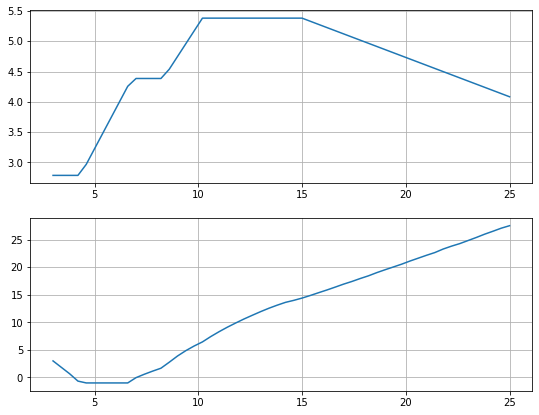

In [72]:
M = np.loadtxt('/Users/dzalkind/Downloads/Megablade_35_sr180_GenEff_control_schedule.txt',delimiter=',')

UU = M[:,0]

rot_speed = M[:,1] * rpm2RadSec

rot_speed

min_pitch = np.deg2rad(M[:,2])

min_pitch

ds = 4

fig, axs = plt.subplots(2,1)

# axs[0].plot(UU,rot_speed)
axs[0].plot(UU[::ds],rot_speed[::ds]/ rpm2RadSec)
# axs[1].plot(UU,min_pitch)
axs[1].plot(UU[::ds],np.rad2deg(min_pitch[::ds]))




[a.grid(True) for a in axs]

np.set_printoptions(linewidth=np.inf)

# print(min_pitch)

print(np.array2string(min_pitch[::ds], separator=', ', precision=3))
print(np.array2string(UU[::ds], separator=', ', precision=3))
print(np.array2string(rot_speed[::ds], separator=', ', precision=3))

# # len(min_pitch)

# # a = '3.000000  3.100000  3.200000  3.300000  3.400000  3.500000  3.600000  3.700000  3.800000  3.900000  4.000000  4.100000  4.200000  4.300000  4.400000  4.500000  4.600000  4.700000  4.800000  4.900000  5.000000  5.100000  5.200000  5.300000  5.400000  5.500000  5.600000  5.700000  5.800000  5.900000  6.000000  6.100000  6.200000  6.300000  6.400000  6.500000  6.600000  6.700000  6.800000  6.900000  7.000000  7.100000  7.200000  7.300000  7.400000  7.500000  7.600000  7.700000  7.800000  7.900000  8.000000  8.100000  8.200000  8.300000  8.400000  8.500000  8.600000  8.700000  8.800000  8.900000  9.000000  9.100000  9.200000  9.300000  9.400000  9.500000  9.600000  9.700000  9.800000  9.900000  10.000000  10.100000  10.200000  10.300000  10.400000  10.500000  10.600000  10.700000  10.800000  10.900000  11.000000  11.100000  11.200000  11.300000  11.400000  11.500000  11.600000  11.700000  11.800000  11.900000  12.000000  12.100000  12.200000  12.300000  12.400000  12.500000  12.600000  12.700000  12.800000  12.900000  13.000000  13.100000  13.200000  13.300000  13.400000  13.500000  13.600000  13.700000  13.800000  13.900000  14.000000  14.100000  14.200000  14.300000  14.400000  14.500000  14.600000  14.700000  14.800000  14.900000  15.000000  15.100000  15.200000  15.300000  15.400000  15.500000  15.600000  15.700000  15.800000  15.900000  16.000000  16.100000  16.200000  16.300000  16.400000  16.500000  16.600000  16.700000  16.800000  16.900000  17.000000  17.100000  17.200000  17.300000  17.400000  17.500000  17.600000  17.700000  17.800000  17.900000  18.000000  18.100000  18.200000  18.300000  18.400000  18.500000  18.600000  18.700000  18.800000  18.900000  19.000000  19.100000  19.200000  19.300000  19.400000  19.500000  19.600000  19.700000  19.800000  19.900000  20.000000  20.100000  20.200000  20.300000  20.400000  20.500000  20.600000  20.700000  20.800000  20.900000  21.000000  21.100000  21.200000  21.300000  21.400000  21.500000  21.600000  21.700000  21.800000  21.900000  22.000000  22.100000  22.200000  22.300000  22.400000  22.500000  22.600000  22.700000  22.800000  22.900000  23.000000  23.100000  23.200000  23.300000  23.400000  23.500000  23.600000  23.700000  23.800000  23.900000  24.000000  24.100000  24.200000  24.300000  24.400000  24.500000  24.600000  24.700000  24.800000  24.900000  25.000000                ! PRC_WindSpeeds	- Array of wind speeds used in rotor speed vs. wind speed lookup table [m/s].'

# len(rot_speed[::ds])

In [71]:
co = comb_out[0]

ind = co['Time'] > 100

co['Wind1VelX'][ind].mean()
co['GenSpeed'][ind].mean()
co['PC_RefSpd'][ind].mean() / rpm2RadSec



4.087098938599873

,fq_0,psd_0,fq_1,psd_1,fq_2,psd_2
0,0.000000,1.671551e+10,0.000000,1.965097e+10,0.000000,1.081063e+10
1,0.000153,6.689014e+09,0.000153,7.170768e+09,0.000153,3.754186e+09
2,0.000305,3.124308e+07,0.000305,1.730212e+06,0.000305,4.290867e+06
3,0.000458,4.563406e+07,0.000458,6.438544e+06,0.000458,1.180544e+06
4,0.000610,3.262825e+07,0.000610,4.078779e+06,0.000610,7.362297e+05
...,...,...,...,...,...,...
262140,39.999390,9.375684e-05,39.999390,2.434349e-04,39.999390,1.894379e-04
262141,39.999542,1.289097e-05,39.999542,8.927871e-05,39.999542,3.235635e-04
262142,39.999695,5.578019e-05,39.999695,6.308301e-05,39.999695,2.832569e-05
262143,39.999847,6.688827e-05,39.999847,9.410833e-05,39.999847,4.557659e-05


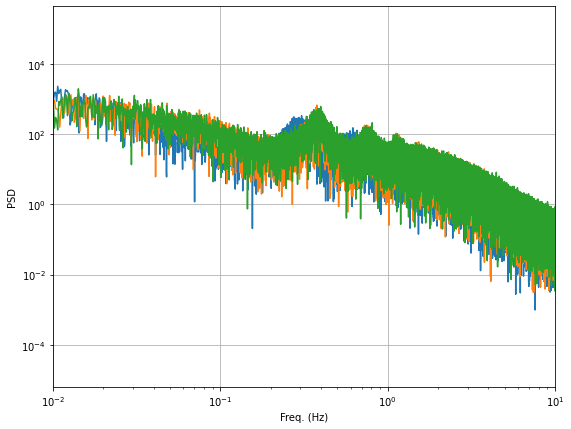

In [28]:
# plot thrust spectra

df = pd.DataFrame()

for i in range(3):
    fq, y, _ = spectral.fft_wrap(
                        fast_out[i]['Time'], fast_out[i]['RotThrust'], averaging='Welch', averaging_window='Hamming', output_type='psd')

    plt.plot(fq,np.sqrt(y))
    
    df['fq_'+str(i)] = fq
    df['psd_'+str(i)] = y
    
#     fq, y, _ = spectral.fft_wrap(
#                         fast_out[i]['Time'], fast_out[i]['RtVAvgxh'], averaging='Welch', averaging_window='Hamming', output_type='psd')

#     plt.plot(fq,np.sqrt(y))
    
#     fq, y, _ = spectral.fft_wrap(
#                     fast_out[i]['Time'], fast_out[i]['Wind1VelX'], averaging='Welch', averaging_window='Hamming', output_type='psd')

#     plt.plot(fq,np.sqrt(y))
    
    
    
    
    
plt.yscale('log')
plt.xscale('log')

plt.xlim([1e-2,10])
plt.grid('True')

plt.xlabel('Freq. (Hz)')
plt.ylabel('PSD')


df.to_pickle('/Users/dzalkind/Tools/RAFT/designs/rotors/thrust_psd.p')
df

In [27]:
fast_out[3]

{'Time': array([0.00000e+00, 1.30000e-02, 2.50000e-02, ..., 7.99975e+02,
        7.99987e+02, 8.00000e+02]),
 'FA_AccF': array([ 0.000e+00,  1.264e-23, -8.574e-23, ..., -9.656e-17, -9.670e-17,
        -9.684e-17]),
 'FA_AccR': array([-0.000e+00,  7.226e-18, -7.774e-17, ..., -3.648e-17,  2.417e-17,
         2.873e-17]),
 'RotSpeed': array([0.6132, 0.6131, 0.613 , ..., 0.5879, 0.5878, 0.5878]),
 'RotSpeedF': array([0.6132, 0.6132, 0.6132, ..., 0.5932, 0.5932, 0.5931]),
 'GenSpeed': array([0.6132, 0.6131, 0.613 , ..., 0.5879, 0.5878, 0.5878]),
 'GenSpeedF': array([0.6132, 0.6132, 0.6132, ..., 0.5932, 0.5932, 0.5931]),
 'FA_Acc': array([0., 0., 0., ..., 0., 0., 0.]),
 'Fl_Pitcom': array([-0.000e+00,  1.481e-24, -8.567e-24, ...,  4.151e-13,  4.151e-13,
         4.151e-13]),
 'PC_MinPit': array([0., 0., 0., ..., 0., 0., 0.]),
 'SS_dOmF': array([-0.0007917, -0.0007917, -0.0007901, ..., -0.0004443, -0.0004443,
        -0.0004444]),
 'WE_Vw': array([8.963, 8.963, 8.963, ..., 7.916, 7.916, 7.916

(PtfmYaw,0) max period = 150.00041666666667
(PtfmYaw,1) max period = 85.71452380952381


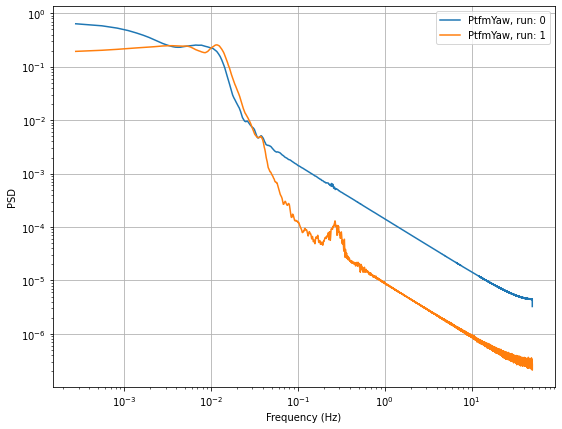

In [11]:
# Plot Spectral

_,_,max_periods = op.plot_spectral(fast_out,[('PtfmYaw',0),('PtfmYaw',1)],showplot=False,detrend=True)
yaw_fast = fast_out[0]['PtfmYaw']
std_yaw_fast = np.std(yaw_fast)
amp = std_yaw_fast * np.sqrt(2)




# save_yaml(dir_matrix, 'case_matrix.yaml', matrix_out_yaml)

# op

In [48]:
# ret

In [49]:
1/2e-3

3600/38


94.73684210526316

1.9752718440907233

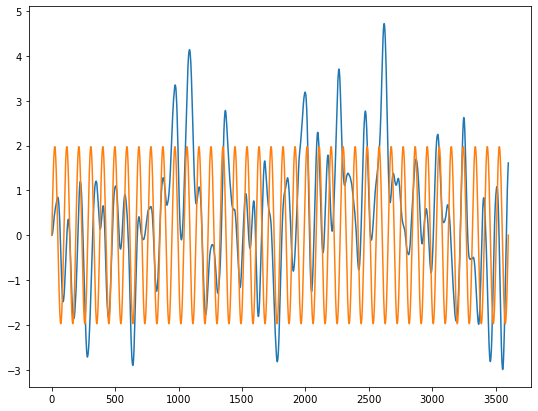

In [50]:
yaw_fast = fast_out[0]['PtfmYaw']
amp = np.std(yaw_fast) * np.sqrt(2)


per = 3600/38

tt = fast_out[0]['Time']

yaw_sowfa = amp * np.sin(2 * np.pi / per * tt)


plt.plot(tt,yaw_fast,tt,yaw_sowfa)

np.min(yaw_fast)

amp

In [51]:
# pull from eagle if necessary
pull_script = '/Users/dzalkind/Tools/WEIS-3/pCrunch/HPC_tools/eagle2local_sim_inp.sh'


basedir = outfiles[0].split('/')[1]
# if basedir == 'scratch':
    
temp = outfiles[0].split('/')
filedir = '/'.join(temp[:-1]) + '/'

namebase = temp[-1].split('.')[0]
search_str = namebase + '*'

shell_cmd = pull_script + ' ' + filedir + ' ' + namebase

shell_cmd
# ret = subprocess.call(pull_script,shell=True)


'/Users/dzalkind/Tools/WEIS-3/pCrunch/HPC_tools/eagle2local_sim_inp.sh /Users/dzalkind/Tools/WEIS-3/results/CT-semi/ntm_long/DISCON-CT-semi/ iea15mw_07'